In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
application_train= dd.read_csv("../../data/application_train.csv").compute()
a = application_train.shape
print("application_train shape :({},{})".format( a[0],a[1]))

bureau_balance= dd.read_csv("../../data/bureau_balance.csv").compute()
a = bureau_balance.shape
print("bureau_balance shape :({},{})".format( a[0],a[1]))

bureau= dd.read_csv("../../data/bureau.csv").compute()
a = bureau.shape
print("bureau shape :({},{})".format( a[0],a[1]))

application_train shape :(307511,122)
bureau_balance shape :(27299925,3)
bureau shape :(1716428,17)


In [4]:
bureau_balance=bureau[['SK_ID_BUREAU','SK_ID_CURR']].merge(bureau_balance,on='SK_ID_BUREAU',how ='left')
bureau_balance=application_train[['SK_ID_CURR','TARGET']].merge(bureau_balance,on='SK_ID_CURR',how='left')
del application_train, bureau

In [5]:
bureau_balance.shape

(15687442, 5)

In [12]:
px.pie(values=bureau_balance.TARGET.value_counts(),names=bureau_balance.TARGET.value_counts().index)

<h2>TARGET / MONTHS_BALANCE (Mois de solde par rapport à la date de demande (-1 signifie la date du solde le plus frais))</h2>

In [9]:
bureau_balance.MONTHS_BALANCE.describe()

count    1.470161e+07
mean    -2.863028e+01
std      2.206971e+01
min     -9.600000e+01
25%     -4.300000e+01
50%     -2.400000e+01
75%     -1.000000e+01
max      0.000000e+00
Name: MONTHS_BALANCE, dtype: float64

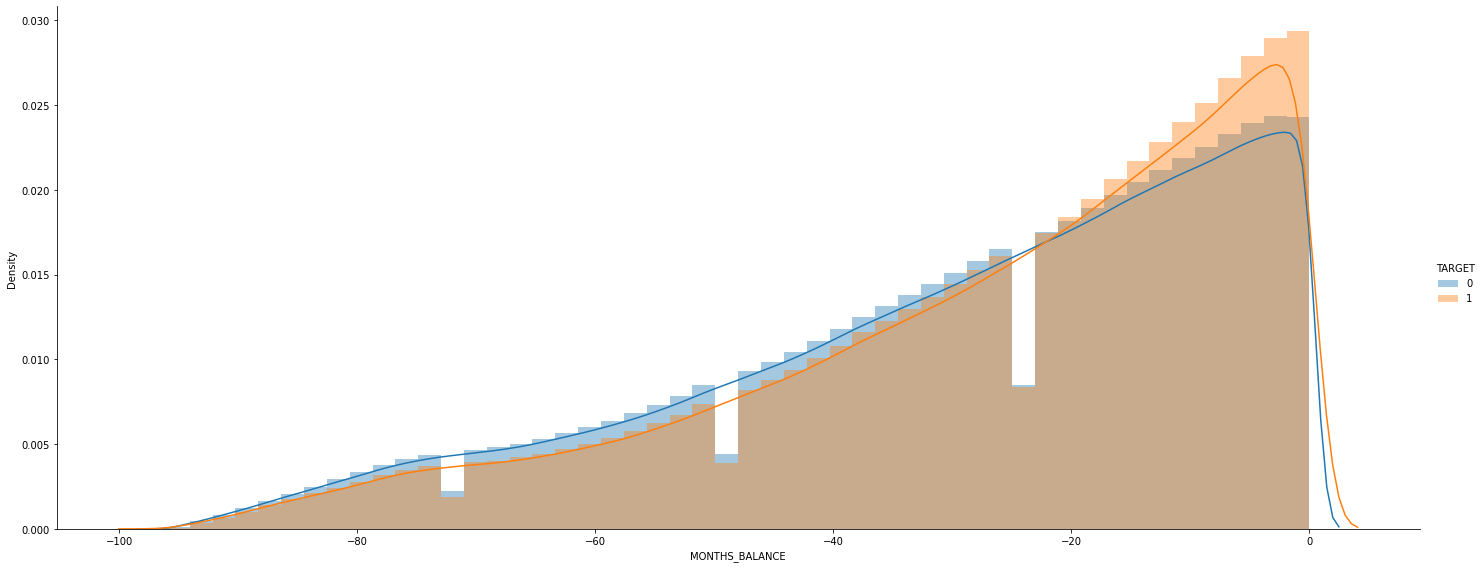

In [11]:
sns.FacetGrid(data=bureau_balance, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'MONTHS_BALANCE').add_legend()

<h2>TARGET / STATUS (Statut du prêt du Bureau du crédit pendant le mois (actif, fermé, DPD0-30,… [c signifie fermé, x signifie statut inconnu, 0 signifie pas de DPD, 1 signifie maximal pendant le mois entre 1-30, 2 signifie DPD 31-60 ,… 5 signifie DPD 120+ ou vendu ou radié]))</h2>

Days Past Due ou DPD est l'un des éléments importants de votre dossier de crédit indiquant vos antécédents financiers. Il indique si vous avez été constant dans vos remboursements et si vous en avez manqué, combien de versements vous avez manqués et de combien de jours. Il reflète également l'historique de remboursement de votre carte de crédit.

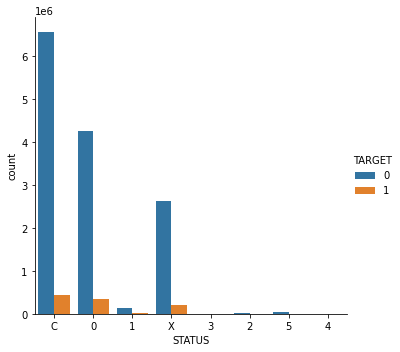

In [7]:
sns.catplot(x='STATUS', kind="count",hue='TARGET', data=bureau_balance)